In [3]:
import numpy as np
import pandas as pd
import re

In [2]:
def getReplacementList (list_name):
    allWords = [line.rstrip('\n') for line in  open(list_name, 'r') ]
    oldWords = [allWords[i] for i in range(len(allWords)) if i % 2 == 0]
    newWords = [allWords[i] for i in range(len(allWords)) if i % 2 == 1]
    return [oldWords, newWords]

In [3]:
getReplacementList('c:/Users/STLEE/FOMC/Fed_Funds_ML-master/data/wordlist.txt')

[['maximum employment',
  'price stability',
  'federal open market committee',
  'board of governors',
  'considerable period',
  'considerable time',
  'federal funds rate',
  'discount rate',
  'core inflation',
  'forward guidance',
  'federal reserve',
  'sustainable economic growth'],
 ['maximumemployment',
  'pricestability',
  'fomc',
  'boardofgovernors',
  'considerableperiod',
  'considerabletime',
  'fedfundsrate',
  'discountrate',
  'coreinflation',
  'forwardguidance',
  'federalreserve',
  'sustecongrowth']]

In [4]:
import glob
filenames = glob.glob('c:/Users/STLEE/FOMC/My Project/statements/statements.raw/*.txt')

In [5]:
filenames

['c:/Users/STLEE/FOMC/My Project/statements/statements.raw\\statement.fomc.19990518.txt',
 'c:/Users/STLEE/FOMC/My Project/statements/statements.raw\\statement.fomc.19990630.txt',
 'c:/Users/STLEE/FOMC/My Project/statements/statements.raw\\statement.fomc.19990824.txt',
 'c:/Users/STLEE/FOMC/My Project/statements/statements.raw\\statement.fomc.19991005.txt',
 'c:/Users/STLEE/FOMC/My Project/statements/statements.raw\\statement.fomc.19991116.txt',
 'c:/Users/STLEE/FOMC/My Project/statements/statements.raw\\statement.fomc.19991221.txt',
 'c:/Users/STLEE/FOMC/My Project/statements/statements.raw\\statement.fomc.20000202.txt',
 'c:/Users/STLEE/FOMC/My Project/statements/statements.raw\\statement.fomc.20000321.txt',
 'c:/Users/STLEE/FOMC/My Project/statements/statements.raw\\statement.fomc.20000516.txt',
 'c:/Users/STLEE/FOMC/My Project/statements/statements.raw\\statement.fomc.20000628.txt',
 'c:/Users/STLEE/FOMC/My Project/statements/statements.raw\\statement.fomc.20000822.txt',
 'c:/Users

In [6]:
filenames[1].split('.')[-2]

'19990630'

In [7]:
rawtext=[]
for file in filenames:
    with open(file) as data:
        txt=data.read()
    dates=file.split('.')[-2]
    raw={'date':dates,'text':txt}    
    rawtext.append(raw)

In [8]:
rawtextdf=pd.DataFrame(rawtext)

In [9]:
rawtextdf

,date,text
0,19990518,For immediate release \n \n \n \n \n \n \n\nTh...
1,19990630,For immediate release \n \n \n \n \n \n \n\n\t...
2,19990824,For immediate release \n \n \n \n \n \n \n\nTh...
3,19991005,For immediate release \n \n \n \n \n \n \n \n\...
4,19991116,For immediate release \n \n \n \n \n \n \n \n\...
...,...,...
168,20190918,For release at 2:00 p.m. EDT ...
169,20191030,For release at 2:00 p.m. EDT ...
170,20191211,For release at 2:00 p.m. EST ...
171,20200129,For release at 2:00 p.m. EST ...


In [10]:
def cleantext(i):
    
    try:
        startpos=re.search(".*(?:[Ss]hare)\s*",i).end()
    except:
        startpos=re.search("[Ff]or\s(?:[Ii]mmediate\s)*[Rr]elease\s*(?:[Ss]hare)*\s*",i).end()
    
    test=i[startpos:]
    test=re.sub('\n',' ',test)
    test=re.sub('\t',' ',test)
    test=re.sub(' +',' ',test)

    try: 
        endpos=re.search("(\s*[Ii]mplementation\s[Nn]ote\s[Ii]ssued.*)$",test).start()
        test=test[:endpos]
    except:
        test=test.strip()
    
    try: 
        endpos=re.search("(\s*Statement\s[Rr]egard.*)$",test).start()
        test=test[:endpos]
        
    except:
        test=test.strip()
    
    return test

In [11]:
rawtextdf['cleantext']=rawtextdf['text'].apply(cleantext)

In [12]:
rawtextdf.drop('text',axis=1,inplace=True)

In [13]:
rawtextdf['date']=pd.to_datetime(rawtextdf['date'],format='%Y%m%d', errors='coerce')

In [14]:
cleantextdf=rawtextdf
cleantextdf

,date,cleantext
0,1999-05-18,The Federal Reserve released the following sta...
1,1999-06-30,The Federal Open Market Committee today voted ...
2,1999-08-24,The Federal Open Market Committee today voted ...
3,1999-10-05,The Federal Open Market Committee decided toda...
4,1999-11-16,The Federal Open Market Committee today voted ...
...,...,...
168,2019-09-18,Information received since the Federal Open Ma...
169,2019-10-30,Information received since the Federal Open Ma...
170,2019-12-11,Information received since the Federal Open Ma...
171,2020-01-29,Information received since the Federal Open Ma...


In [15]:
cleantextdf.to_csv('c:/Users/STLEE/FOMC/My Project/textdf/cleantextdf.csv')

In [4]:
cleantextdf=pd.read_csv('c:/Users/STLEE/FOMC/My Project/textdf/cleantextdf.csv',index_col=[0])

In [10]:
cleantextdf['date']=pd.to_datetime(cleantextdf['date'],format='%Y-%m-%d', errors='coerce')
cleantextdf

,date,cleantext
0,1999-05-18,The Federal Reserve released the following sta...
1,1999-06-30,The Federal Open Market Committee today voted ...
2,1999-08-24,The Federal Open Market Committee today voted ...
3,1999-10-05,The Federal Open Market Committee decided toda...
4,1999-11-16,The Federal Open Market Committee today voted ...
...,...,...
168,2019-09-18,Information received since the Federal Open Ma...
169,2019-10-30,Information received since the Federal Open Ma...
170,2019-12-11,Information received since the Federal Open Ma...
171,2020-01-29,Information received since the Federal Open Ma...


In [6]:
targetratesdf=pd.read_csv('c:/Users/STLEE/FOMC/My Project/target fund rate vs futures/targetrateandfutures.csv')
targetratesdf['Date']=pd.to_datetime(targetratesdf['Date'],format='%Y-%m-%d', errors='coerce')

In [11]:
cleantextdf=pd.merge(cleantextdf,targetratesdf[['Date','Rate','Change']],left_on='date',right_on='Date',how='left')
cleantextdf.drop('Date',inplace=True,axis=1)

In [14]:
cleantextdf=cleantextdf[['date','Rate','Change','cleantext']]

In [15]:
cleantextdf.to_csv('c:/Users/STLEE/FOMC/My Project/textdf/cleantextwithratesdf.csv')

## Split by complete sentences

In [85]:
from nltk.tokenize import sent_tokenize

In [86]:
test='i am sorry. i am gone.'
test1={}
test1['test']=sent_tokenize(test)

In [87]:
test1.items()

dict_items([('test', ['i am sorry.', 'i am gone.'])])

In [88]:
sentdf=cleantextdf.copy()

In [115]:
str(sentdf.iloc[0][0])

'1999-05-18'

In [127]:
def sentencesplitter(x,y):
    i={}
    i[x]=y
    return i

{1: 2}

In [ ]:
sentdf['sentences']=sentdf[['date','cleantext']].apply(sentencesplitter(x,y),axis=1)
sentdf

In [131]:
from nltk.tokenize import sent_tokenize
def sentencesplitter(x):
    return {x['date']:sent_tokenize(x['cleantext'])}

In [132]:
sentdf['sentences']=sentdf.apply(sentencesplitter,axis=1)
sentdf

,date,cleantext,sentences
0,1999-05-18,The Federal Reserve released the following sta...,{'1999-05-18': ['The Federal Reserve released ...
1,1999-06-30,The Federal Open Market Committee today voted ...,{'1999-06-30': ['The Federal Open Market Commi...
2,1999-08-24,The Federal Open Market Committee today voted ...,{'1999-08-24': ['The Federal Open Market Commi...
3,1999-10-05,The Federal Open Market Committee decided toda...,{'1999-10-05': ['The Federal Open Market Commi...
4,1999-11-16,The Federal Open Market Committee today voted ...,{'1999-11-16': ['The Federal Open Market Commi...
...,...,...,...
168,2019-09-18,Information received since the Federal Open Ma...,{'2019-09-18': ['Information received since th...
169,2019-10-30,Information received since the Federal Open Ma...,{'2019-10-30': ['Information received since th...
170,2019-12-11,Information received since the Federal Open Ma...,{'2019-12-11': ['Information received since th...
171,2020-01-29,Information received since the Federal Open Ma...,{'2020-01-29': ['Information received since th...


In [323]:
df = pd.DataFrame(columns=['index','0'])
for i in range(len(sentdf.index)):
    df1 = pd.concat([pd.DataFrame(v,index=np.repeat(k, len(v))) 
                    for k, v in sentdf.iloc[i][2].items()]).reset_index()
    df=df.append(df1,ignore_index=True)
df.drop('0',axis=1,inplace=True)
df.columns=['date','singlesentence']

In [324]:
df.join()

,date,singlesentence
0,1999-05-18,The Federal Reserve released the following sta...
1,1999-05-18,Trend increases in costs and core prices have ...
2,1999-05-18,But domestic financial markets have recovered ...
3,1999-05-18,Against the background of already-tight domest...
4,1999-06-30,The Federal Open Market Committee today voted ...
...,...,...
2371,2020-03-03,"However, the coronavirus poses evolving risks ..."
2372,2020-03-03,In light of these risks and in support of achi...
2373,2020-03-03,The Committee is closely monitoring developmen...
2374,2020-03-03,Voting for the monetary policy action were Jer...


In [334]:
singlesentdf=pd.merge(df, sentdf[['date','cleantext']], left_on='date', right_on='date',how='left')
singlesentdf=singlesentdf[['date','cleantext','singlesentence']]

In [370]:
import string
singlesentdf['singlesentence']=singlesentdf['singlesentence'].apply(lambda x: x.strip(' \n\t'))

In [373]:
print(singlesentdf.iloc[2375][2])

For media inquiries, call 202-452-2955.


In [1034]:
singlesentdf

,date,cleantext,singlesentence,singlesentence_processed
0,1999-05-18,The Federal Reserve released the following sta...,The Federal Reserve released the following sta...,the federal reserve released the following sta...
1,1999-05-18,The Federal Reserve released the following sta...,Trend increases in costs and core prices have ...,trend increases in costs and core prices have ...
2,1999-05-18,The Federal Reserve released the following sta...,But domestic financial markets have recovered ...,but domestic financial markets have recovered ...
3,1999-05-18,The Federal Reserve released the following sta...,Against the background of already-tight domest...,against the background of already-tight domest...
4,1999-06-30,The Federal Open Market Committee today voted ...,The Federal Open Market Committee today voted ...,the federal open market committee today voted ...
...,...,...,...,...
2371,2020-03-03,The fundamentals of the U.S. economy remain st...,"However, the coronavirus poses evolving risks ...",however the coronavirus poses evolving risks t...
2372,2020-03-03,The fundamentals of the U.S. economy remain st...,In light of these risks and in support of achi...,in light of these risks and in support of achi...
2373,2020-03-03,The fundamentals of the U.S. economy remain st...,The Committee is closely monitoring developmen...,the committee is closely monitoring developmen...
2374,2020-03-03,The fundamentals of the U.S. economy remain st...,Voting for the monetary policy action were Jer...,voting for the monetary policy action were jer...


In [1249]:
targetratesdf=pd.read_csv('c:/Users/STLEE/FOMC/My Project/target fund rate vs futures/targetrateandfutures.csv')

In [1253]:
singlesentdf=pd.merge(singlesentdf,targetratesdf[['Date','Rate','Change']],left_on='date',right_on='Date',how='left')

In [1255]:
singlesentdf.drop('Date',axis=1,inplace=True)

In [1258]:
singlesentdf=singlesentdf[['date','Rate','Change','cleantext','singlesentence','singlesentence_processed']]
singlesentdf

,date,Rate,Change,cleantext,singlesentence,singlesentence_processed
0,1999-05-18,4.750,0.00,The Federal Reserve released the following sta...,The Federal Reserve released the following sta...,the federal reserve released the following sta...
1,1999-05-18,4.750,0.00,The Federal Reserve released the following sta...,Trend increases in costs and core prices have ...,trend increases in costs and core prices have ...
2,1999-05-18,4.750,0.00,The Federal Reserve released the following sta...,But domestic financial markets have recovered ...,but domestic financial markets have recovered ...
3,1999-05-18,4.750,0.00,The Federal Reserve released the following sta...,Against the background of already-tight domest...,against the background of already-tight domest...
4,1999-06-30,5.000,0.25,The Federal Open Market Committee today voted ...,The Federal Open Market Committee today voted ...,the federal open market committee today voted ...
...,...,...,...,...,...,...
2371,2020-03-03,1.125,-0.50,The fundamentals of the U.S. economy remain st...,"However, the coronavirus poses evolving risks ...",however the coronavirus poses evolving risks t...
2372,2020-03-03,1.125,-0.50,The fundamentals of the U.S. economy remain st...,In light of these risks and in support of achi...,in light of these risks and in support of achi...
2373,2020-03-03,1.125,-0.50,The fundamentals of the U.S. economy remain st...,The Committee is closely monitoring developmen...,the committee is closely monitoring developmen...
2374,2020-03-03,1.125,-0.50,The fundamentals of the U.S. economy remain st...,Voting for the monetary policy action were Jer...,voting for the monetary policy action were jer...


In [1259]:
singlesentdf.to_csv('c:/Users/STLEE/FOMC/My Project/textdf/singlesentdf.csv')

# Topic Modeling with LDA

In [58]:
singlesentdf=pd.read_csv('c:/Users/STLEE/FOMC/My Project/textdf/singlesentdf.csv',index_col=0)

In [59]:
singlesentdf

,date,Rate,Change,cleantext,singlesentence,singlesentence_processed
0,1999-05-18,4.750,0.00,The Federal Reserve released the following sta...,The Federal Reserve released the following sta...,the federal reserve released the following sta...
1,1999-05-18,4.750,0.00,The Federal Reserve released the following sta...,Trend increases in costs and core prices have ...,trend increases in costs and core prices have ...
2,1999-05-18,4.750,0.00,The Federal Reserve released the following sta...,But domestic financial markets have recovered ...,but domestic financial markets have recovered ...
3,1999-05-18,4.750,0.00,The Federal Reserve released the following sta...,Against the background of already-tight domest...,against the background of already-tight domest...
4,1999-06-30,5.000,0.25,The Federal Open Market Committee today voted ...,The Federal Open Market Committee today voted ...,the federal open market committee today voted ...
...,...,...,...,...,...,...
2371,2020-03-03,1.125,-0.50,The fundamentals of the U.S. economy remain st...,"However, the coronavirus poses evolving risks ...",however the coronavirus poses evolving risks t...
2372,2020-03-03,1.125,-0.50,The fundamentals of the U.S. economy remain st...,In light of these risks and in support of achi...,in light of these risks and in support of achi...
2373,2020-03-03,1.125,-0.50,The fundamentals of the U.S. economy remain st...,The Committee is closely monitoring developmen...,the committee is closely monitoring developmen...
2374,2020-03-03,1.125,-0.50,The fundamentals of the U.S. economy remain st...,Voting for the monetary policy action were Jer...,voting for the monetary policy action were jer...


In [37]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from gensim import corpora, models
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\STLEE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [73]:
nltk.pos_tag(nltk.word_tokenize('labor'))

[('labor', 'NN')]

In [201]:
preprocess('financial')

['financi']

In [196]:
gensim.utils.simple_preprocess('Financial')

['financial']

In [165]:
stopwords=['Federal','Open','Market','Committee','Information','America','Today','Statement','FOMC','Meeting','Reserve','market','markets']
stopwordlist=[gensim.utils.simple_preprocess(x)[0] for x in stopwords]

In [159]:
replacement={'labor':'employment','unemployment':'employment','price':'inflation','pricing':'inflation','prices':'inflation'}

In [92]:
replacement[gensim.utils.simple_preprocess('price')[0]]

'inflation'

In [200]:
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for x,y in nltk.pos_tag(nltk.word_tokenize(text)):
        if 'financial' in gensim.utils.simple_preprocess(x):
            result.append(lemmatize_stemming(gensim.utils.simple_preprocess(x)[0]))
        if 'NN' in y:
            try:
                x=replacement[gensim.utils.simple_preprocess(x)[0]]
            except:
                x=x
            if len(gensim.utils.simple_preprocess(x))>=1:
                token=gensim.utils.simple_preprocess(x)[0]
                if token not in gensim.parsing.preprocessing.STOPWORDS and token not in stopwordlist and len(token) > 3:
                    result.append(lemmatize_stemming(token))
    return result

In [117]:
singlesentdf['singlesentence'][1]

'Trend increases in costs and core prices have generally remained quite subdued.'

In [202]:
processed_docs = singlesentdf['singlesentence'].map(preprocess)
processed_docs[:]

0       [action, stanc, polici, potenti, buildup, imba...
1                    [trend, increas, cost, core, inflat]
2                  [financi, prospect, eas, polici, fall]
3       [background, employ, strength, demand, excess,...
4              [target, fund, rate, basi, point, percent]
                              ...                        
2371                            [coronaviru, risk, activ]
2372    [light, risk, support, employ, inflat, stabil,...
2373            [develop, implic, outlook, tool, economi]
2374    [polici, action, jerom, powel, chair, john, wi...
2375                                     [media, inquiri]
Name: singlesentence, Length: 2376, dtype: object

In [203]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 action
1 buildup
2 direct
3 economi
4 firm
5 imbal
6 perform
7 polici
8 possibl
9 potenti
10 stanc


In [204]:
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1

0 action
1 buildup
2 direct
3 economi
4 firm
5 imbal
6 perform
7 polici
8 possibl
9 potenti
10 stanc
11 core
12 cost
13 increas
14 inflat
15 trend
16 eas
17 fall
18 financi
19 prospect
20 background
21 condit
22 demand
23 develop
24 employ
25 excess
26 gain
27 month
28 need
29 product
30 strength
31 basi
32 fund
33 percent
34 point
35 rate
36 target
37 rat
38 seiz
39 state
40 unit
41 activ
42 pace
43 strain
44 adjust
45 degre
46 growth
47 pressur
48 quarter
49 balanc
50 forc
51 predilect
52 resolut
53 emerg
54 environ
55 board
56 discount
57 governor
58 expans
59 turmoil
60 june
61 risk
62 consequ
63 outlook
64 regard
65 term
66 atlanta
67 bank
68 boston
69 chicago
70 citi
71 cleveland
72 director
73 francisco
74 kansa
75 loui
76 philadelphia
77 request
78 richmond
79 york
80 depositori
81 district
82 institut
83 job
84 pool
85 suppli
86 worker
87 circumst
88 manner
89 commit
90 member
91 persist
92 evid
93 sector
94 slow
95 check
96 continu
97 august
98 cours
99 year
100 credit
101 ch

In [205]:
count

591

In [206]:
dictionary.filter_extremes(no_below=15, no_above=0.5)

In [207]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

Create the corpus for without tfidf and with tfidf

In [208]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

## LDA without tfidf

In [240]:
lda_model = gensim.models.LdaModel(bow_corpus, num_topics=9, id2word=dictionary, passes=100, chunksize=1000, iterations=800,
                                       alpha=0.1, eta=0.1, random_state=10, per_word_topics=True)

In [234]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.219*"inflat" + 0.079*"employ" + 0.050*"stabil" + 0.040*"develop" + 0.038*"condit" + 0.036*"financi" + 0.035*"pressur" + 0.033*"mandat" + 0.031*"energi" + 0.030*"indic"
Topic: 1 
Words: 0.108*"polici" + 0.088*"growth" + 0.088*"risk" + 0.071*"time" + 0.061*"level" + 0.051*"accommod" + 0.049*"judg" + 0.049*"recoveri" + 0.038*"product" + 0.037*"economi"
Topic: 2 
Words: 0.221*"secur" + 0.144*"agenc" + 0.099*"hold" + 0.073*"polici" + 0.066*"treasuri" + 0.050*"month" + 0.046*"debt" + 0.044*"payment" + 0.032*"level" + 0.028*"pace"
Topic: 3 
Words: 0.340*"inflat" + 0.109*"expect" + 0.093*"measur" + 0.072*"goal" + 0.061*"balanc" + 0.040*"compens" + 0.037*"develop" + 0.035*"year" + 0.034*"risk" + 0.029*"month"
Topic: 4 
Words: 0.070*"chairman" + 0.049*"william" + 0.049*"polici" + 0.047*"vice" + 0.047*"action" + 0.029*"powel" + 0.029*"jerom" + 0.027*"charl" + 0.025*"lael" + 0.025*"brainard"
Topic: 5 
Words: 0.138*"employ" + 0.093*"activ" + 0.068*"pace" + 0.060*"rate" + 0.054*"s

In [242]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.474723601274305


In [133]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
pyLDAvis.enable_notebook()

In [241]:
vis_lda_model = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis_lda_model

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.212890  0.042890       1        1  16.732777
5     -0.234940  0.058410       2        1  12.569305
3     -0.109069  0.054350       3        1  12.252619
2     -0.051159 -0.041647       4        1  12.232152
7      0.324179  0.156225       5        1  11.636833
4      0.324084  0.128377       6        1   9.679673
6     -0.221549  0.143003       7        1   8.889476
8      0.151395 -0.145710       8        1   8.703300
1      0.029949 -0.395900       9        1   7.303871, topic_info=       Term         Freq        Total Category  logprob  loglift
9    inflat  1341.000000  1341.000000  Default  30.0000  30.0000
17   employ   701.000000   701.000000  Default  29.0000  29.0000
25     rate   651.000000   651.000000  Default  28.0000  28.0000
22     fund   429.000000   429.000000  Default  27.0000  27.0000
105   secur   328.000000   328.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
19    month    10.510913   172.846497   Topic9  -4.8942  -0.1832
90    indic     6.742548   151.793396   Topic9  -5.3382  -0.4973
17   employ    12.256639   701.064331   Topic9  -4.7406  -1.4298
214  dissip     0.106416    10.729120   Topic9  -9.4870  -1.9966
14   condit     4.497150   460.047882   Topic9  -5.7432  -2.0111

[373 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
106       8  0.988361  accommod
67        1  0.994680   account
0         3  0.052724    action
0         5  0.346868    action
0         6  0.341318    action
...     ...       ...       ...
64        3  0.084670      year
64        9  0.771437      year
160       5  0.858552    yellen
160       6  0.128783    yellen
57        8  0.988092      york

[325 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 4, 3, 8, 5, 7, 9, 2])

In [1265]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaModel(corpus=corpus,
                                     id2word=dictionary,
                                     num_topics=num_topics, 
                                     random_state=10,
                                     chunksize=1000,
                                     passes=100,
                                     iterations=800,
                                     alpha=0.1, 
                                     eta=0.1,
                                     per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [1234]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=50, step=2)

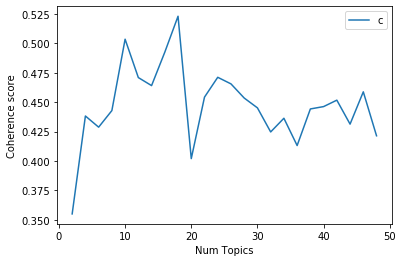

In [1235]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
# Show graph
limit=50; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

In [1277]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus)

In [1282]:
topicsdf = pd.concat([singlesentdf, df_topic_sents_keywords], axis=1)

In [1293]:
topicsdf.iloc[3][5]

'against the background of already-tight domestic labor markets and ongoing strength in demand in excess of productivity gains the committee recognizes the need to be alert to developments over coming months that might indicate that financial conditions may no longer be consistent with containing inflation'

In [29]:
topicsdf[topicsdf['Dominant_Topic']==5].iloc[0][4]

'But domestic financial markets have recovered and foreign economic prospects have improved since the easing of monetary policy last fall.'

In [1304]:
topicsdf.to_csv('c:/Users/STLEE/FOMC/My Project/LDA/topicsdf.csv')

In [5]:
topicsdf=pd.read_csv('c:/Users/STLEE/FOMC/My Project/LDA/topicsdf.csv',index_col=0)

In [9]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_LDA = pd.DataFrame()

sent_topics_outdf_grpd = topicsdf.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_LDA = pd.concat([sent_topics_sorteddf_LDA, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_LDA.reset_index(drop=True, inplace=True)

# Show
sent_topics_sorteddf_LDA

,date,Rate,Change,cleantext,singlesentence,singlesentence_processed,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,2016-04-27,0.375,0.00,Information received since the Federal Open Ma...,The Committee is maintaining its existing poli...,the committee is maintaining its existing poli...,0.0,0.9415,"secur, agenc, hold, purchas, polici, account, ..."
1,2011-01-26,0.125,0.00,Information received since the Federal Open Ma...,Growth in household spending picked up late la...,growth in household spending picked up late la...,1.0,0.9174,"spend, busi, household, invest, growth, hous, ..."
2,2012-04-25,0.125,0.00,Information received since the Federal Open Ma...,"In particular, the Committee decided today to ...",in particular the committee decided today to k...,2.0,0.9379,"rate, fund, target, percent, rang, condit, tim..."
3,2010-08-10,0.125,0.00,Information received since the Federal Open Ma...,"Nonetheless, the Committee anticipates a gradu...",nonetheless the committee anticipates a gradua...,3.0,0.9099,"price, stabil, mandat, energi, employ, level, ..."
4,2009-06-24,0.125,0.00,Information received since the Federal Open Ma...,Voting for the FOMC monetary policy action wer...,voting for the fomc monetary policy action wer...,4.0,0.9602,"chairman, charl, evan, randal, action, richard..."
5,2003-05-06,1.250,0.00,The Federal Open Market Committee decided to k...,Although the timing and extent of that improve...,although the timing and extent of that improve...,5.0,0.9099,"labor, activ, outlook, risk, condit, market, g..."
6,2005-02-02,2.500,0.25,The Federal Open Market Committee decided toda...,Voting for the FOMC monetary policy action wer...,voting for the fomc monetary policy action wer...,6.0,0.9656,"chairman, action, polici, susan, bie, demand, ..."
7,2016-11-02,0.375,0.00,Information received since the Federal Open Ma...,Market-based measures of inflation compensatio...,market-based measures of inflation compensatio...,7.0,0.8901,"inflat, expect, object, measur, develop, press..."
8,2005-03-22,2.750,0.25,The Federal Open Market Committee decided toda...,"The Committee believes that, even after this a...",the committee believes that even after this ac...,8.0,0.8765,"polici, stanc, pace, goal, inflat, growth, con..."
9,2016-12-14,0.625,0.25,Information received since the Federal Open Ma...,Voting for the FOMC monetary policy action wer...,voting for the fomc monetary policy action wer...,9.0,0.9617,"william, action, jerom, powel, lael, brainard,..."


In [36]:
sent_topics_sorteddf_LDA.iloc[1][4]

'Growth in household spending picked up late last year, but remains constrained by high unemployment, modest income growth, lower housing wealth, and tight credit.'

In [1302]:
# Number of Documents for Each Topic
topic_counts = topicsdf['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_LDA[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"secur, agenc, hold, purchas, polici, account, ...",209,0.0880
1.0,1.0,"spend, busi, household, invest, growth, hous, ...",210,0.0884
2.0,2.0,"rate, fund, target, percent, rang, condit, tim...",438,0.1843
3.0,3.0,"price, stabil, mandat, energi, employ, level, ...",242,0.1019
4.0,4.0,"chairman, charl, evan, randal, action, richard...",61,0.0257
5.0,5.0,"labor, activ, outlook, risk, condit, market, g...",325,0.1368
6.0,6.0,"chairman, action, polici, susan, bie, demand, ...",79,0.0332
7.0,7.0,"inflat, expect, object, measur, develop, press...",398,0.1675
8.0,8.0,"polici, stanc, pace, goal, inflat, growth, con...",218,0.0918
9.0,9.0,"william, action, jerom, powel, lael, brainard,...",73,0.0307


## LDA with tfidf

In [1228]:
lda_model_tfidf = gensim.models.LdaModel(corpus_tfidf, num_topics=11, id2word=dictionary, passes=100, chunksize=1000, iterations=800,
                                       alpha=0.1, eta=0.1, random_state=10, per_word_topics=True)

In [1229]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.122*"object" + 0.090*"term" + 0.072*"path" + 0.068*"expans" + 0.060*"data" + 0.052*"outlook" + 0.050*"activ" + 0.040*"percent" + 0.039*"septemb" + 0.037*"uncertainti"
Topic: 1 Word: 0.117*"spend" + 0.114*"busi" + 0.112*"household" + 0.109*"invest" + 0.067*"growth" + 0.061*"hous" + 0.044*"sector" + 0.038*"quarter" + 0.027*"export" + 0.027*"year"
Topic: 2 Word: 0.103*"fund" + 0.089*"target" + 0.079*"percent" + 0.077*"rate" + 0.073*"rang" + 0.046*"view" + 0.043*"inflat" + 0.039*"food" + 0.033*"increas" + 0.033*"item"
Topic: 3 Word: 0.103*"employ" + 0.098*"mandat" + 0.072*"stabil" + 0.062*"adjust" + 0.057*"price" + 0.047*"stanc" + 0.044*"object" + 0.042*"condit" + 0.040*"time" + 0.034*"size"
Topic: 4 Word: 0.073*"measur" + 0.049*"unemploy" + 0.038*"gain" + 0.035*"expect" + 0.033*"inflat" + 0.032*"read" + 0.027*"compens" + 0.027*"assess" + 0.027*"indic" + 0.026*"averag"
Topic: 5 Word: 0.096*"activ" + 0.084*"risk" + 0.073*"labor" + 0.067*"outlook" + 0.054*"balanc" + 0.046*"j

In [1230]:
vis_lda_model_tfidf = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
vis_lda_model_tfidf

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.111436 -0.101340       1        1  13.450111
5     -0.056424 -0.106568       2        1  11.043161
2      0.231657  0.006531       3        1  10.969715
3      0.151067 -0.114678       4        1  10.167757
7     -0.077731 -0.118473       5        1   9.933603
10     0.245500  0.196455       6        1   8.323659
6     -0.131637  0.058936       7        1   7.931159
9     -0.060013  0.242525       8        1   7.864331
1     -0.218916  0.193113       9        1   7.554621
8     -0.127144 -0.160983      10        1   6.781533
0      0.155078 -0.095519      11        1   5.980354, topic_info=        Term        Freq       Total Category  logprob  loglift
107    secur   73.000000   73.000000  Default  30.0000  30.0000
158   object   71.000000   71.000000  Default  29.0000  29.0000
18    inflat  177.000000  177.000000  Default  28.0000  28.0000
97     spend   53.000000   53.000000  Default  27.0000  27.0000
88      busi   52.000000   52.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
69    remain    0.090683   14.863683  Topic11  -8.2696  -2.2826
156  disrupt    0.090666   12.767430  Topic11  -8.2698  -2.1308
218   medium    0.090664    7.445406  Topic11  -8.2698  -1.5915
157     view    0.090659   32.813019  Topic11  -8.2699  -3.0748
0     action    0.090652   56.612385  Topic11  -8.2699  -3.6203

[426 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
108       2  0.671366  accommod
108       3  0.282680  accommod
68        5  0.965938   account
0         1  0.211968    action
0         2  0.123648    action
...     ...       ...       ...
65        8  0.064594      year
65        9  0.258375      year
65       10  0.473688      year
162       1  0.941961    yellen
58        6  0.955537      york

[415 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 3, 4, 8, 11, 7, 10, 2, 9, 1])